In [1]:
import numpy as np 
import pandas as pd 
import sys, requests, shutil, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import subplots

In [3]:
data=pd.read_csv('train.csv',index_col='id')
test_data = pd.read_csv('test.csv')
data.head(5)

,url,landmark_id
id,,
6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


dtype('int64')

In [9]:
print("Train data shape -  rows:",data.shape[0]," columns:", data.shape[1])
print("Test data size -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Train data shape -  rows: 4132914  columns: 3
Test data size -  rows: 117703  columns: 2


In [8]:
test_data.head()

,id,url
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...


In [10]:
data.nunique()

id             4132914
url            4132914
landmark_id     203094
dtype: int64

In [4]:
th10 = pd.DataFrame(data.landmark_id.value_counts().head(10))
th10.reset_index(level=0, inplace=True)
th10.columns = ['landmark_id','count']
th10

,landmark_id,count
0,138982,10247
1,62798,4333
2,177870,3327
3,176528,3243
4,192931,2627
5,126637,2589
6,83144,2351
7,171772,2268
8,20409,2248
9,151942,1727


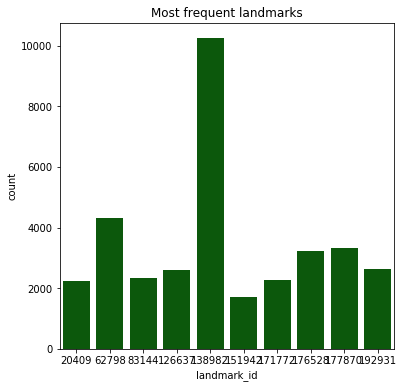

In [5]:
# Plot the most frequent landmark occurences
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=th10,
            label="Count", color="darkgreen")
plt.show()

In [6]:
tb10 = pd.DataFrame(data.landmark_id.value_counts().tail(10))
tb10.reset_index(level=0, inplace=True)
tb10.columns = ['landmark_id','count']
tb10

,landmark_id,count
0,131859,1
1,84859,1
2,22473,1
3,70512,1
4,127852,1
5,134828,1
6,139519,1
7,24520,1
8,17242,1
9,133954,1


In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
from urllib import request
from io import BytesIO

In [8]:
def displayLandmarkImages(urls):
    
    imageStyle = "height: 60px; margin: 2px; float: left; border: 1px solid blue;"
    imagesList = ''.join([f"<img style='{imageStyle}' src='{u}' />" for _, u in urls.iteritems()])
    display(HTML(imagesList))
    
    
def displayLandmarkImagesLarge(urls):
    
    imageStyle = "height: 100px; margin: 2px; float: left; border: 1px solid blue;"
    imagesList = ''.join([f"<img style='{imageStyle}' src='{u}' />" for _, u in urls.iteritems()])

    display(HTML(imagesList))

In [9]:
IMAGES_NUMBER = 10
#landmarkId = data['landmark_id'].value_counts().keys()[1]
urls = data[data['landmark_id'] == 62798]['url'].head(IMAGES_NUMBER)
displayLandmarkImagesLarge(urls)